In [ ]:
!pip install ace_tools

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the training data
train_df = pd.read_csv('/content/drive/MyDrive/66e31d6ee96cd_student_resource_3/student_resource 3/dataset/train.csv')



In [ ]:
print(train_df.info())
print(train_df.head())





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263859 entries, 0 to 263858
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   image_link    263859 non-null  object
 1   group_id      263859 non-null  int64 
 2   entity_name   263859 non-null  object
 3   entity_value  263859 non-null  object
dtypes: int64(1), object(3)
memory usage: 8.1+ MB
None
                                          image_link  group_id  entity_name  \
0  https://m.media-amazon.com/images/I/61I9XdN6OF...    748919  item_weight   
1  https://m.media-amazon.com/images/I/71gSRbyXmo...    916768  item_volume   
2  https://m.media-amazon.com/images/I/61BZ4zrjZX...    459516  item_weight   
3  https://m.media-amazon.com/images/I/612mrlqiI4...    459516  item_weight   
4  https://m.media-amazon.com/images/I/617Tl40LOX...    731432  item_weight   

     entity_value  
0      500.0 gram  
1         1.0 cup  
2      0.709 gram  
3      0.709 gram  
4 

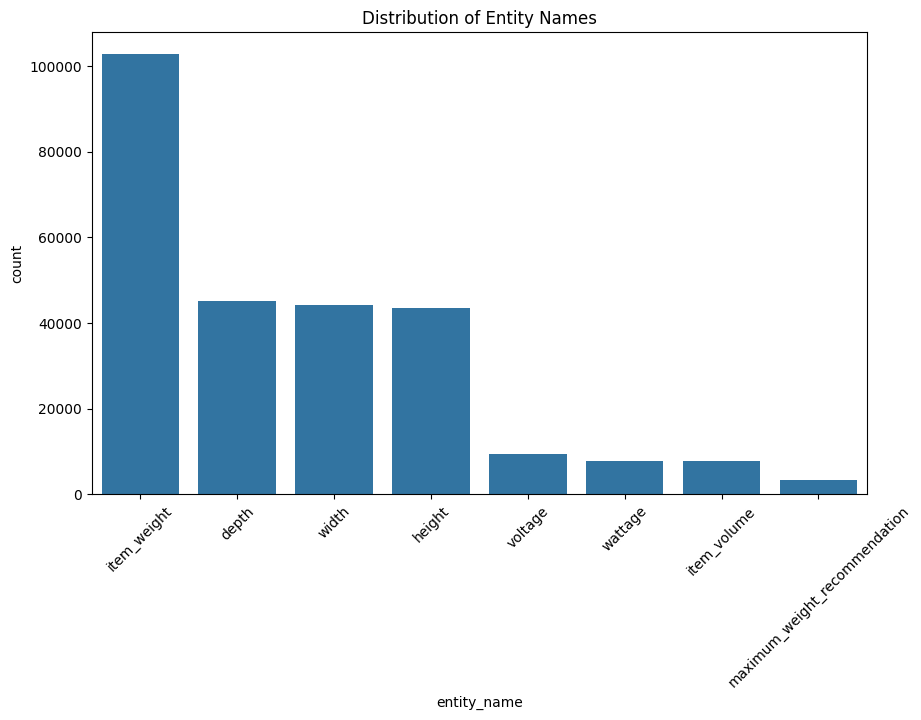

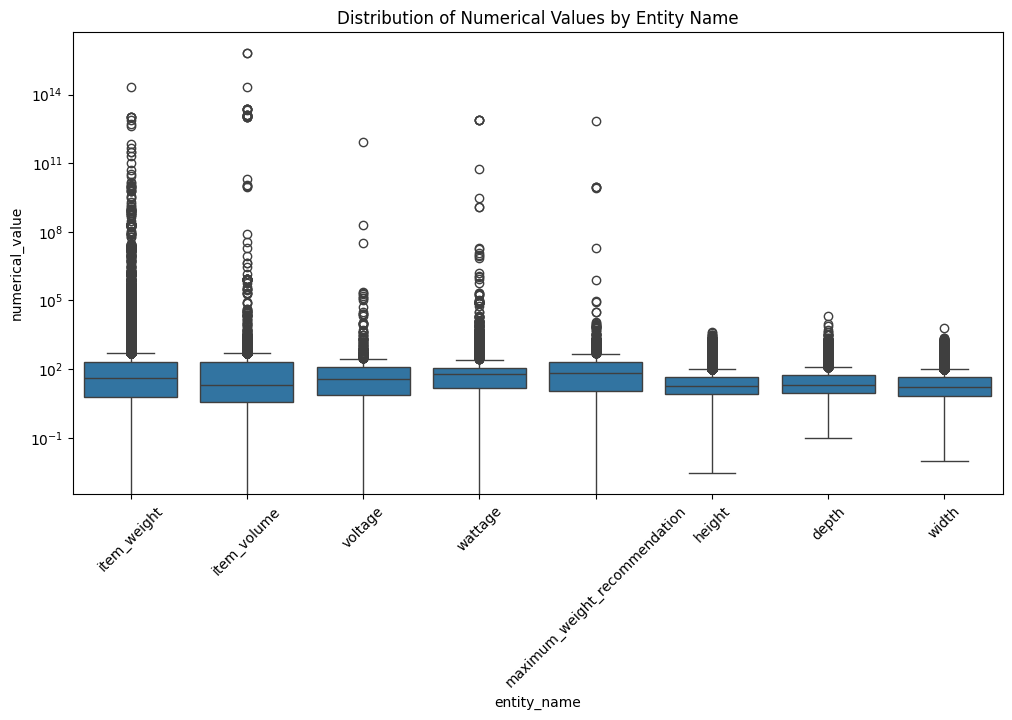

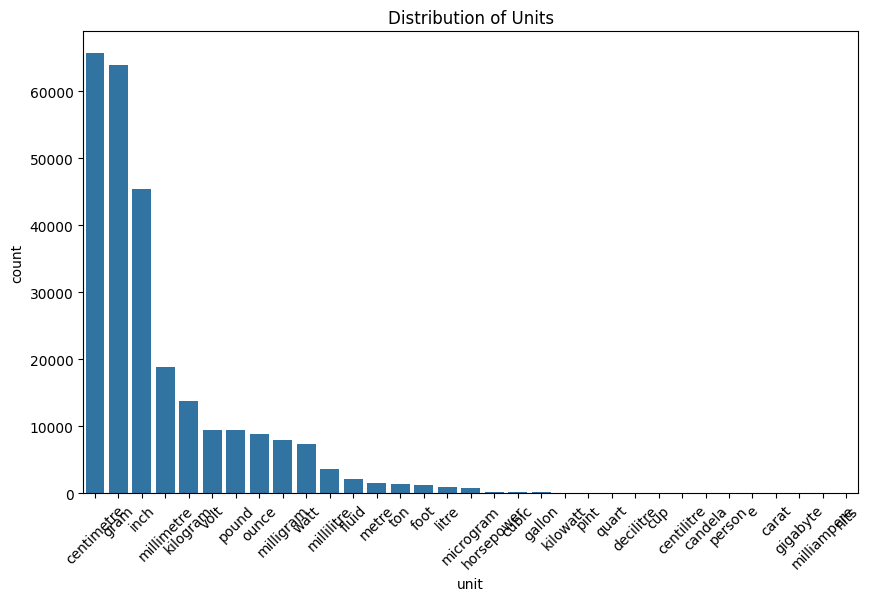

In [ ]:
# Distribution of entity names
plt.figure(figsize=(10, 6))
sns.countplot(data=train_df, x='entity_name', order=train_df['entity_name'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Distribution of Entity Names')
plt.show()

# Analyzing entity values
# Extract numerical part and unit from entity_value
train_df['numerical_value'] = train_df['entity_value'].str.extract(r'(\d+\.?\d*)').astype(float)
train_df['unit'] = train_df['entity_value'].str.extract(r'([a-zA-Z]+)')

# Plot numerical value distribution for different entities
plt.figure(figsize=(12, 6))
sns.boxplot(data=train_df, x='entity_name', y='numerical_value')
plt.xticks(rotation=45)
plt.yscale('log')  # Log scale to handle wide range of values
plt.title('Distribution of Numerical Values by Entity Name')
plt.show()

# Plot unit distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=train_df, x='unit', order=train_df['unit'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Distribution of Units')
plt.show()

In [ ]:
# To find all combinations of entities for the same image and plot their distribution
from itertools import combinations
import matplotlib.pyplot as plt

# Group the data by 'image_link' and aggregate entity names for each image
grouped_entities = data.groupby('image_link')['entity_name'].apply(list)

# Create a list to store all combinations (pairs, triplets, etc.)
entity_combinations = []

# Iterate through the grouped entities to find all combinations
for entities in grouped_entities:
    # Find all pairs, triplets, etc. for each list of entities
    for r in range(2, len(entities) + 1):  # Starting from pairs (r=2) to all entities together
        entity_combinations.extend(combinations(entities, r))

In [ ]:

# Convert the list of combinations to a DataFrame
# Use a list comprehension to dynamically create column names based on the maximum length of combinations
max_len = max(len(c) for c in entity_combinations)
column_names = [f'entity_{i+1}' for i in range(max_len)]
combinations_df = pd.DataFrame(entity_combinations, columns=column_names)


In [ ]:
# Create a new DataFrame with only 'image_link' and 'entity_name'
new_df = train_df[['image_link', 'entity_name']]
new_df.head()




,image_link,entity_name
0,https://m.media-amazon.com/images/I/61I9XdN6OF...,item_weight
1,https://m.media-amazon.com/images/I/71gSRbyXmo...,item_volume
2,https://m.media-amazon.com/images/I/61BZ4zrjZX...,item_weight
3,https://m.media-amazon.com/images/I/612mrlqiI4...,item_weight
4,https://m.media-amazon.com/images/I/617Tl40LOX...,item_weight


In [ ]:
# Combine the entity names if they are associated with the same image link

# Group the dataframe by 'image_link' and combine the entity names into a single string, separated by commas
combined_entities_df = new_df.groupby('image_link')['entity_name'].apply(lambda x: ','.join(x)).reset_index()

# Rename the columns appropriately
combined_entities_df.columns = ['image_link', 'combined_entity_names']

In [ ]:
combined_entities_df.count()


,0
image_link,255906
combined_entity_names,255906


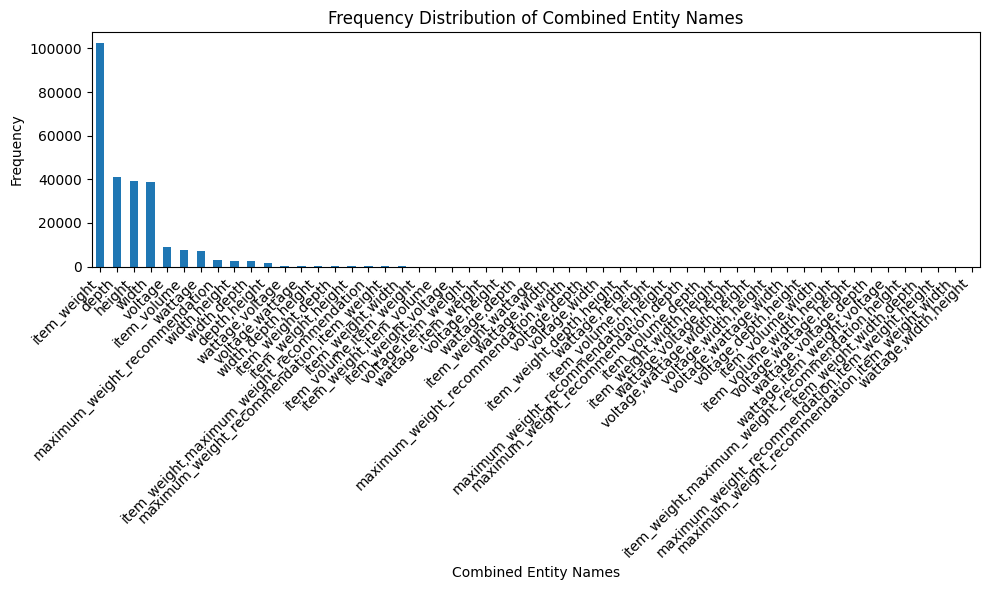

In [ ]:
# Plotting the frequency distribution of all combined entity names

# Count the frequency of each combined entity name
combined_entity_counts = combined_entities_df['combined_entity_names'].value_counts()

# Plot the frequency distribution
plt.figure(figsize=(10, 6))
combined_entity_counts.plot(kind='bar')
plt.xlabel('Combined Entity Names')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Combined Entity Names')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


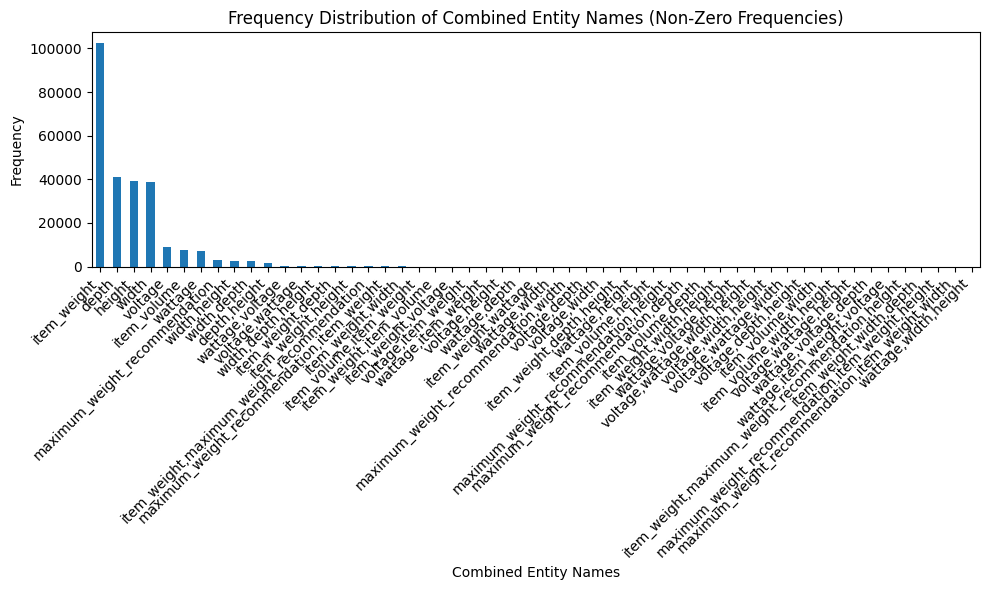

In [ ]:
# Filter out non-zero frequencies
non_zero_combined_entity_counts = combined_entity_counts[combined_entity_counts > 0]

# Plot the frequency distribution of non-zero frequencies
plt.figure(figsize=(10, 6))
non_zero_combined_entity_counts.plot(kind='bar')
plt.xlabel('Combined Entity Names')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Combined Entity Names (Non-Zero Frequencies)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
# Filter the dataframe to include only rows where 'combined_entity_names' have more than one entity
multiple_entities_df = combined_entities_df[combined_entities_df['combined_entity_names'].str.contains(',')]


In [ ]:
multiple_entities_df.count()


,0
image_link,7816
combined_entity_names,7816


In [ ]:
multiple_entities_df.head()

,image_link,combined_entity_names
33,https://m.media-amazon.com/images/I/21KyULg9wd...,"depth,height"
62,https://m.media-amazon.com/images/I/21eGzwhsfl...,"width,height"
82,https://m.media-amazon.com/images/I/21qJp4rHyx...,"depth,height"
160,https://m.media-amazon.com/images/I/310Bnxcbti...,"width,depth"
259,https://m.media-amazon.com/images/I/314AoWGCBy...,"width,height"


In [ ]:
# prompt: download to csv

# Assuming 'multiple_entities_df' is the DataFrame you want to download
multiple_entities_df.to_csv('multiple_entities.csv', index=False)

# Download the file to your local machine
from google.colab import files
files.download('multiple_entities.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import re
from collections import Counter




In [ ]:
# Function to extract the unit from the entity_value
def extract_unit(entity_value):
    # Regular expression to find units in the entity value
    pattern = r'[a-zA-Z]+\.?'
    matches = re.findall(pattern, entity_value)

    # Return the last match which is most likely the unit
    if matches:
        return matches[-1].lower().strip()
    return None

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/66e31d6ee96cd_student_resource_3/student_resource 3/dataset/train.csv')

# Apply the unit extraction function to the entity_value column
df['unit'] = df['entity_value'].apply(lambda x: extract_unit(str(x)))

# Group by entity_name and find the most common unit for each
most_common_units = df.groupby('entity_name')['unit'].apply(lambda x: Counter(x).most_common(1)[0][0])

# Display the result
print("Most common units for each entity_name:")
print(most_common_units)

Most common units for each entity_name:
entity_name
depth                            centimetre
height                           centimetre
item_volume                      millilitre
item_weight                            gram
maximum_weight_recommendation      kilogram
voltage                                volt
wattage                                watt
width                            centimetre
Name: unit, dtype: object


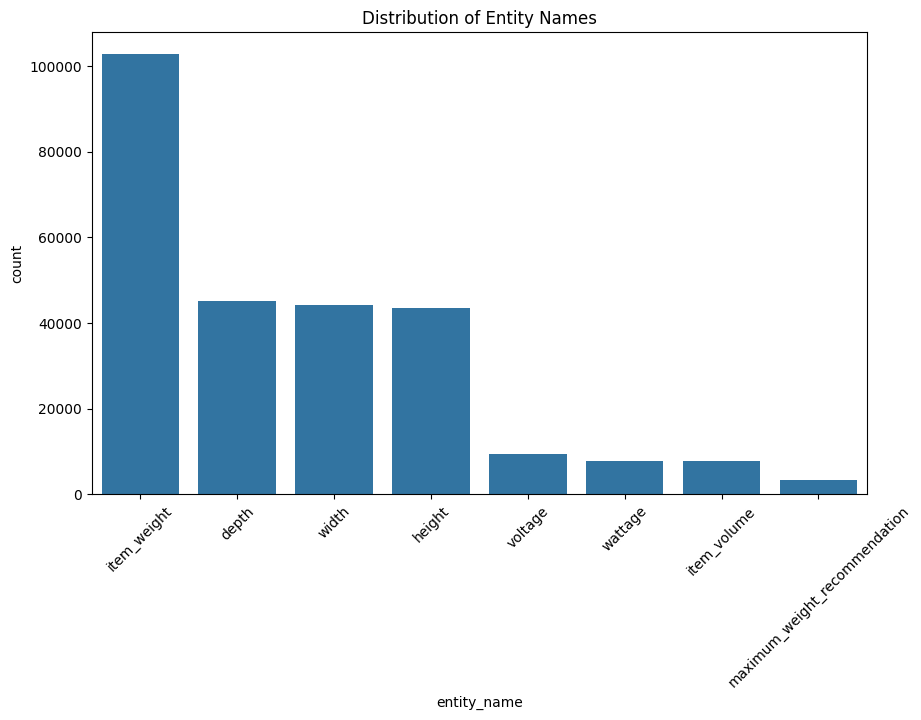

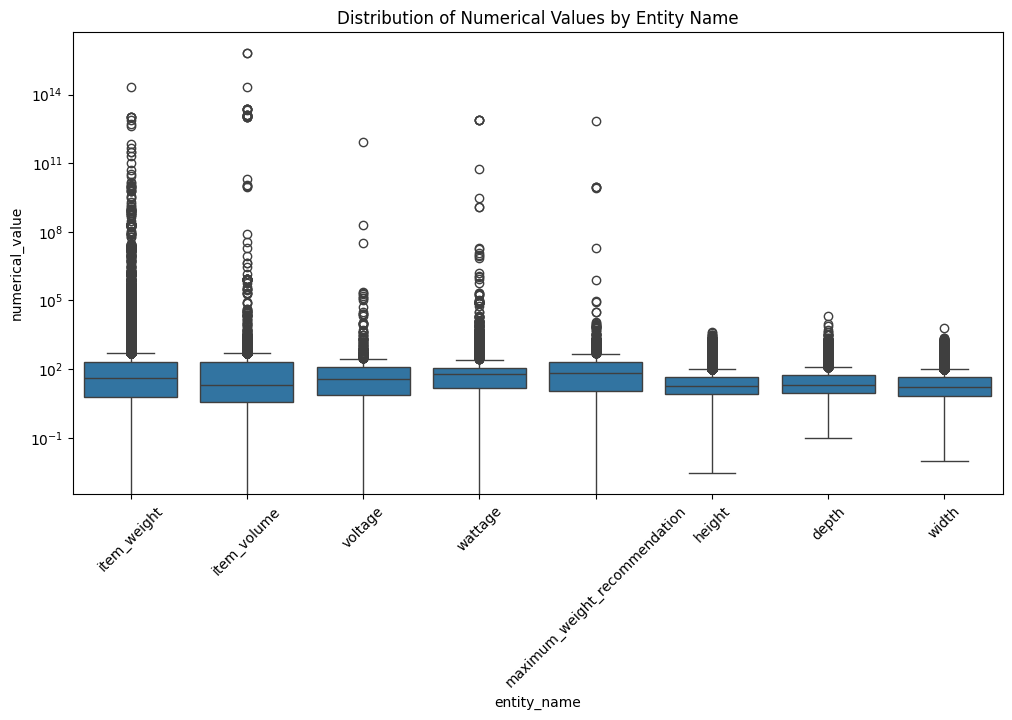

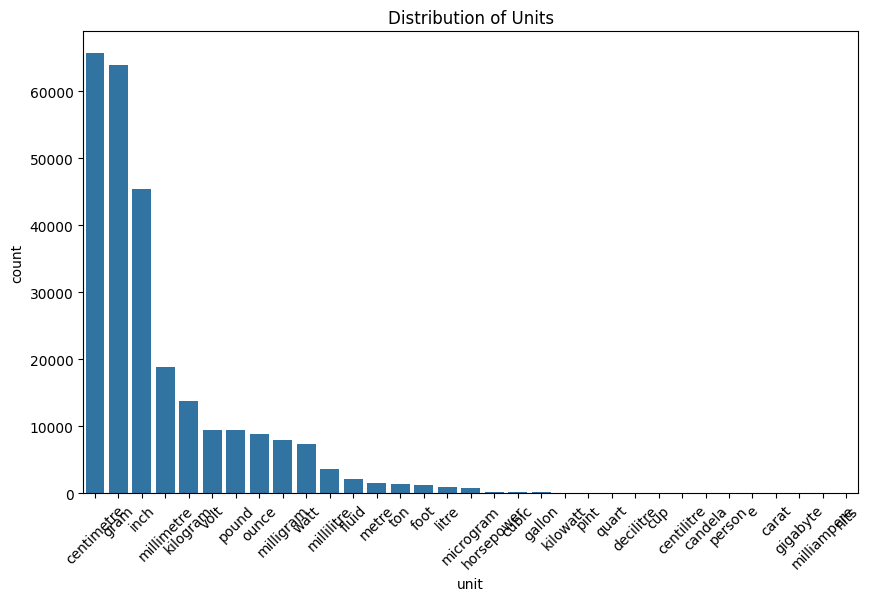

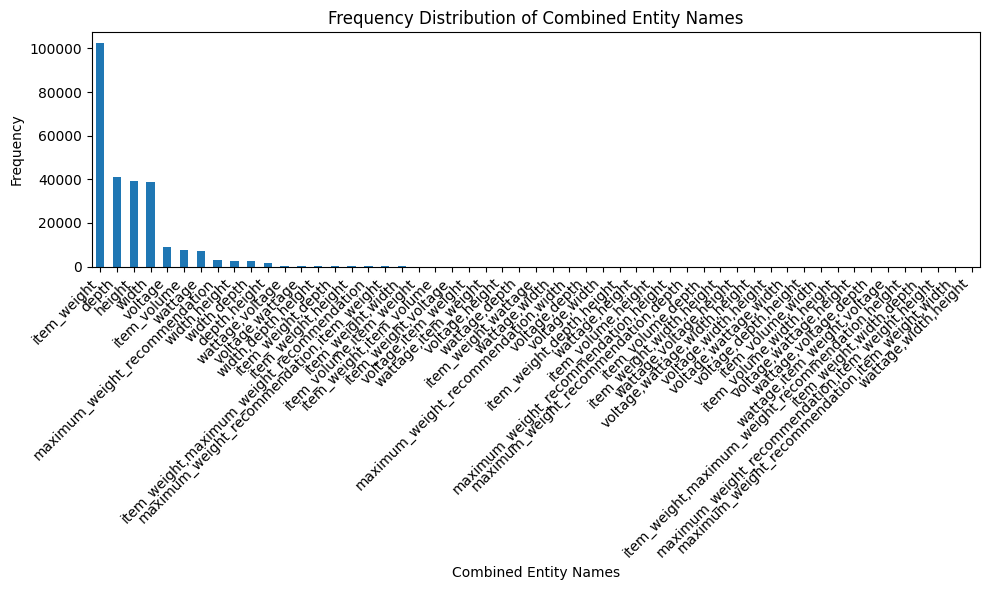

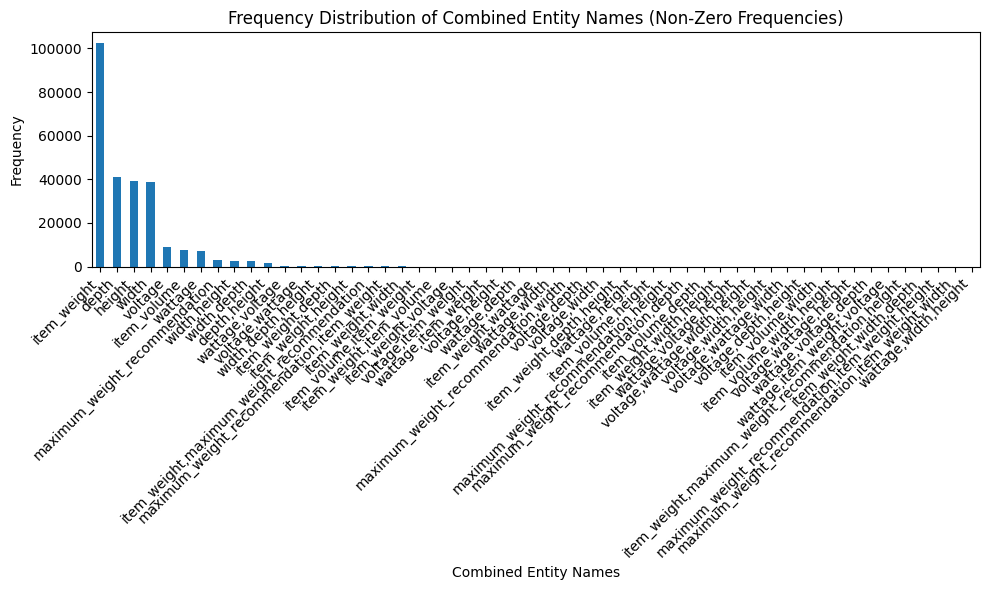

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Most common units for each entity_name:
entity_name
depth                            centimetre
height                           centimetre
item_volume                      millilitre
item_weight                            gram
maximum_weight_recommendation      kilogram
voltage                                volt
wattage                                watt
width                            centimetre
Name: unit, dtype: object


In [ ]:


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from google.colab import files
import re
from collections import Counter
!pip install ace_tools

class EntityAnalyzer:
    def __init__(self, data_path):
        self.data_path = data_path
        self.train_df = None
        self.load_data()
        self.analyze_data()

    def load_data(self):
        self.train_df = pd.read_csv(self.data_path)

    def analyze_data(self):
        # Distribution of entity names
        plt.figure(figsize=(10, 6))
        sns.countplot(data=self.train_df, x='entity_name', order=self.train_df['entity_name'].value_counts().index)
        plt.xticks(rotation=45)
        plt.title('Distribution of Entity Names')
        plt.show()

        # Analyzing entity values
        # Extract numerical part and unit from entity_value
        self.train_df['numerical_value'] = self.train_df['entity_value'].str.extract(r'(\d+\.?\d*)').astype(float)
        self.train_df['unit'] = self.train_df['entity_value'].str.extract(r'([a-zA-Z]+)')

        # Plot numerical value distribution for different entities
        plt.figure(figsize=(12, 6))
        sns.boxplot(data=self.train_df, x='entity_name', y='numerical_value')
        plt.xticks(rotation=45)
        plt.yscale('log')  # Log scale to handle wide range of values
        plt.title('Distribution of Numerical Values by Entity Name')
        plt.show()

        # Plot unit distribution
        plt.figure(figsize=(10, 6))
        sns.countplot(data=self.train_df, x='unit', order=self.train_df['unit'].value_counts().index)
        plt.xticks(rotation=45)
        plt.title('Distribution of Units')
        plt.show()

        # To find all combinations of entities for the same image and plot their distribution
        # Group the data by 'image_link' and aggregate entity names for each image
        grouped_entities = self.train_df.groupby('image_link')['entity_name'].apply(list)

        # Create a list to store all combinations (pairs, triplets, etc.)
        entity_combinations = []

        # Iterate through the grouped entities to find all combinations
        for entities in grouped_entities:
            # Find all pairs, triplets, etc. for each list of entities
            for r in range(2, len(entities) + 1):  # Starting from pairs (r=2) to all entities together
                entity_combinations.extend(combinations(entities, r))

        # Convert the list of combinations to a DataFrame
        # Use a list comprehension to dynamically create column names based on the maximum length of combinations
        max_len = max(len(c) for c in entity_combinations)
        column_names = [f'entity_{i+1}' for i in range(max_len)]
        combinations_df = pd.DataFrame(entity_combinations, columns=column_names)

        # Create a new DataFrame with only 'image_link' and 'entity_name'
        new_df = self.train_df[['image_link', 'entity_name']]

        # Combine the entity names if they are associated with the same image link
        # Group the dataframe by 'image_link' and combine the entity names into a single string, separated by commas
        combined_entities_df = new_df.groupby('image_link')['entity_name'].apply(lambda x: ','.join(x)).reset_index()

        # Rename the columns appropriately
        combined_entities_df.columns = ['image_link', 'combined_entity_names']

        # Plotting the frequency distribution of all combined entity names
        # Count the frequency of each combined entity name
        combined_entity_counts = combined_entities_df['combined_entity_names'].value_counts()

        # Plot the frequency distribution
        plt.figure(figsize=(10, 6))
        combined_entity_counts.plot(kind='bar')
        plt.xlabel('Combined Entity Names')
        plt.ylabel('Frequency')
        plt.title('Frequency Distribution of Combined Entity Names')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

        # Filter out non-zero frequencies
        non_zero_combined_entity_counts = combined_entity_counts[combined_entity_counts > 0]

        # Plot the frequency distribution of non-zero frequencies
        plt.figure(figsize=(10, 6))
        non_zero_combined_entity_counts.plot(kind='bar')
        plt.xlabel('Combined Entity Names')
        plt.ylabel('Frequency')
        plt.title('Frequency Distribution of Combined Entity Names (Non-Zero Frequencies)')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

        # Filter the dataframe to include only rows where 'combined_entity_names' have more than one entity
        multiple_entities_df = combined_entities_df[combined_entities_df['combined_entity_names'].str.contains(',')]

        # Assuming 'multiple_entities_df' is the DataFrame you want to download
        multiple_entities_df.to_csv('multiple_entities.csv', index=False)

        # Download the file to your local machine
        files.download('multiple_entities.csv')

        # Function to extract the unit from the entity_value
        def extract_unit(entity_value):
            # Regular expression to find units in the entity value
            pattern = r'[a-zA-Z]+\.?'
            matches = re.findall(pattern, entity_value)

            # Return the last match which is most likely the unit
            if matches:
                return matches[-1].lower().strip()
            return None

        # Apply the unit extraction function to the entity_value column
        self.train_df['unit'] = self.train_df['entity_value'].apply(lambda x: extract_unit(str(x)))

        # Group by entity_name and find the most common unit for each
        most_common_units = self.train_df.groupby('entity_name')['unit'].apply(lambda x: Counter(x).most_common(1)[0][0])

        # Display the result
        print("Most common units for each entity_name:")
        print(most_common_units)

# Example usage:
data_path = '/content/drive/MyDrive/66e31d6ee96cd_student_resource_3/student_resource 3/dataset/train.csv'
analyzer = EntityAnalyzer(data_path)


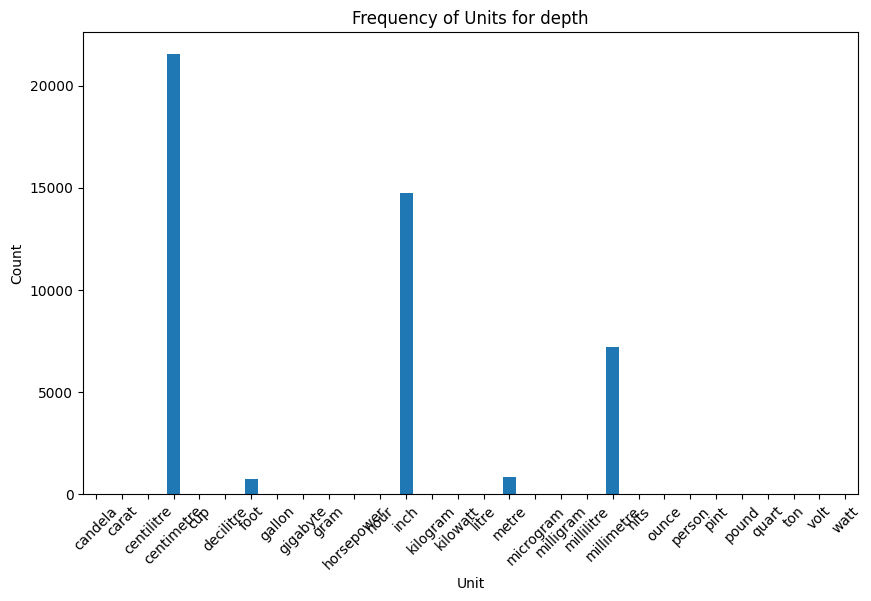

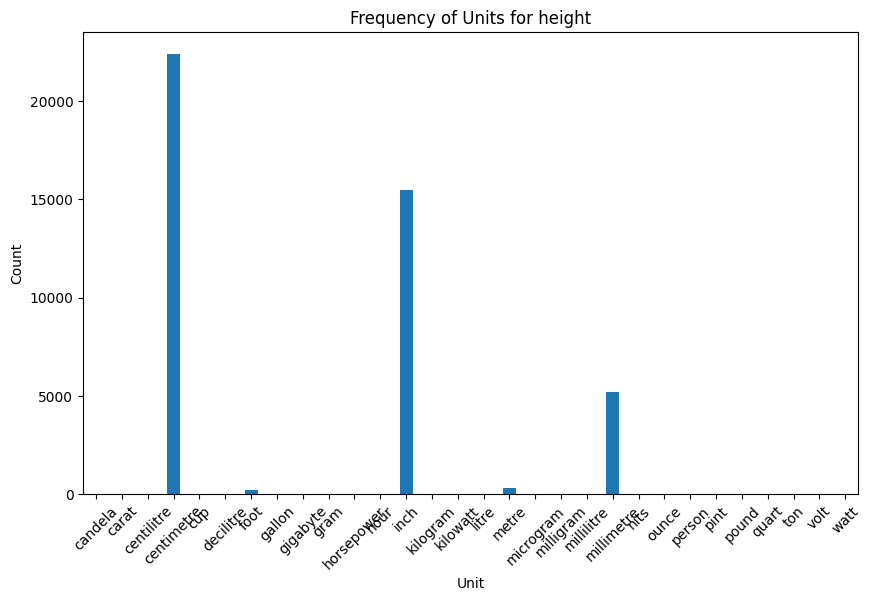

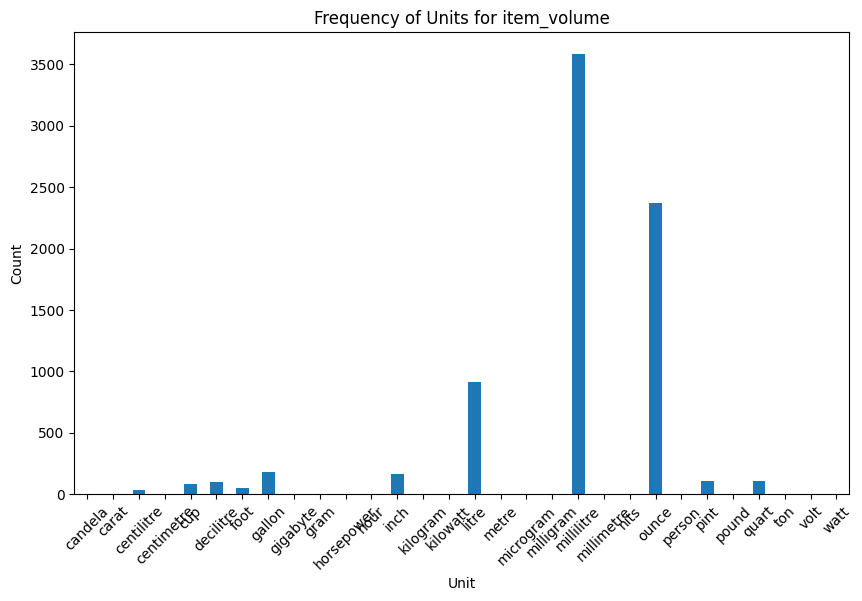

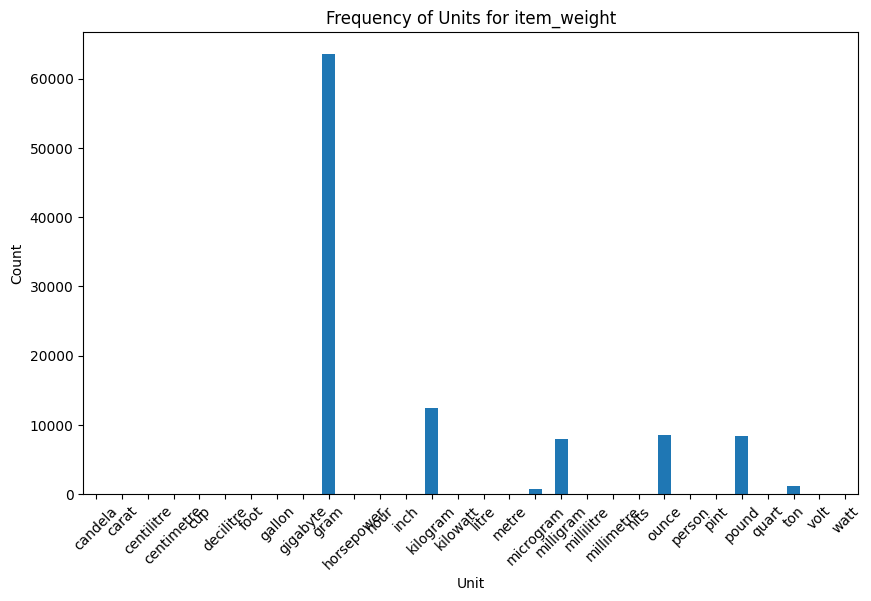

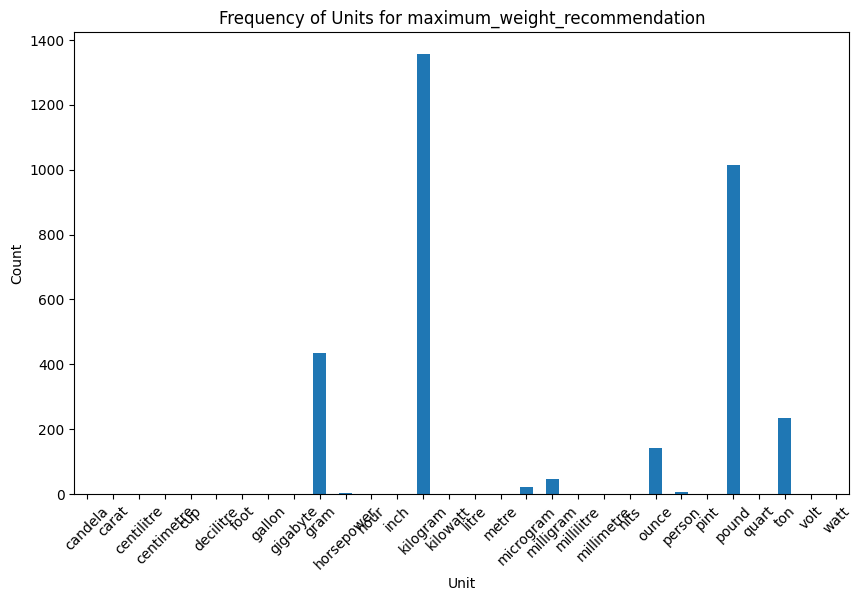

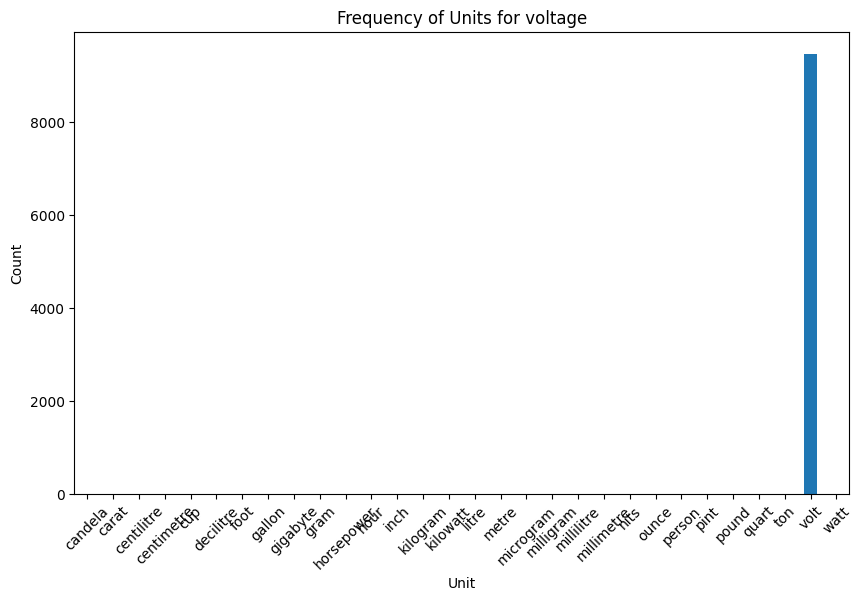

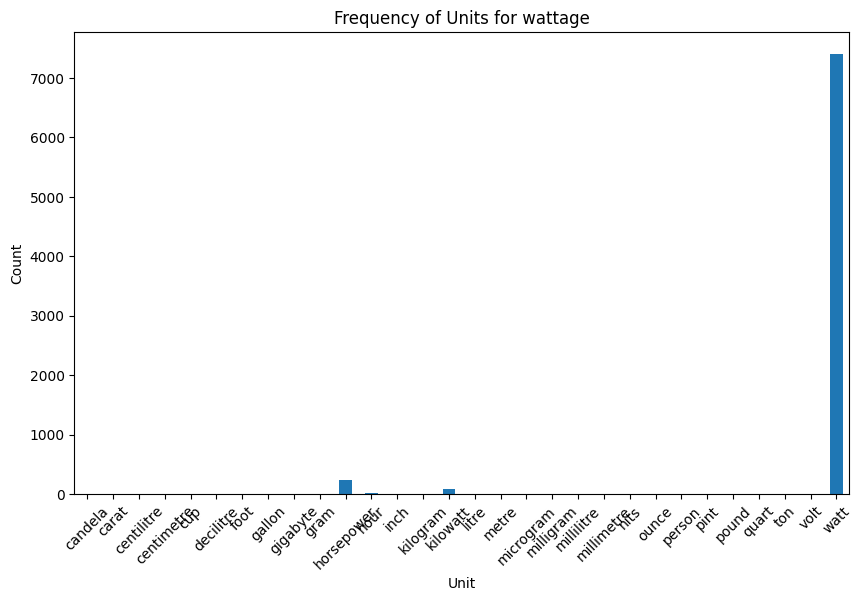

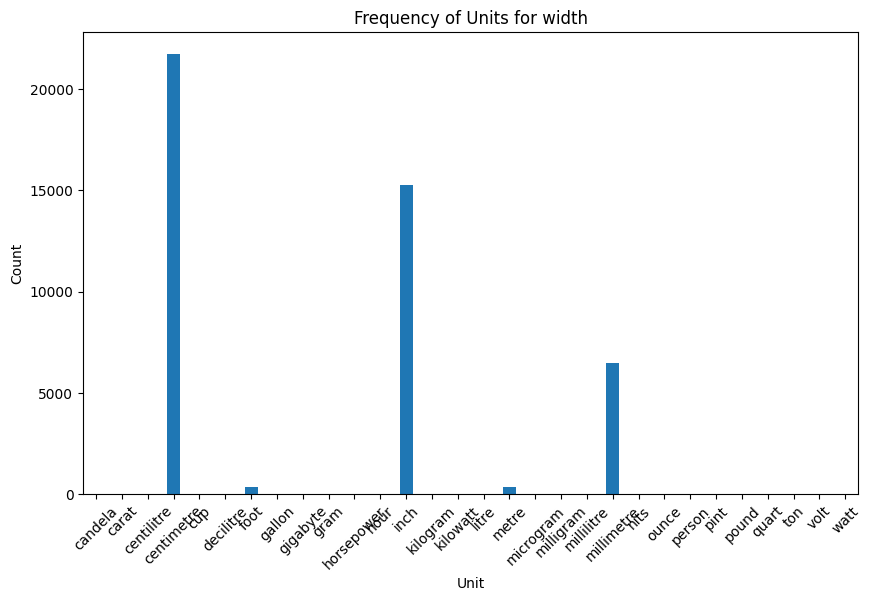

In [7]:
# prompt: give the  frequency plots for the counts of all the unit types for each entity_name

import matplotlib.pyplot as plt

# Group the data by 'entity_name' and then by 'unit' to get the counts
# Use the analyzer instance to access the train_df
unit_counts = analyzer.train_df.groupby(['entity_name', 'unit'])['unit'].count().unstack(fill_value=0)

# Plot the frequency distribution for each entity_name
for entity_name in unit_counts.index:
    plt.figure(figsize=(10, 6))
    unit_counts.loc[entity_name].plot(kind='bar')
    plt.title(f'Frequency of Units for {entity_name}')
    plt.xlabel('Unit')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()